# Linear Regression

## Typical PyTorch Pipeline

In [1]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction
#  - backward pass: gradients
#  - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [19]:
# 0) prepare data

# create data as numpy arrays
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# convert data to tensors
X = torch.from_numpy(X_numpy.astype(np.float32)) # by default X_numpy is of 'double' type
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape y (now the y it is a row, reshape it into a column)
# torch has the "view" method
y = y.view(y.shape[0], 1) # it is now a column the length of the samples

n_samples, n_features = X.shape

In [20]:
print(n_samples)
print(n_features)

100
1


In [21]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) 

In [22]:
# 2) loss and optimizer

learning_rate = 0.01

# MSE
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
# 3) training loop

num_epochs = 200
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, bias: {b[0]:.3f}, loss = {loss.item():.8f}')


epoch 1: w = 1.176, bias: 0.503, loss = 2104.54785156
epoch 11: w = 8.198, bias: 0.028, loss = 1595.11608887
epoch 21: w = 14.134, bias: -0.236, loss = 1232.10900879
epoch 31: w = 19.154, bias: -0.348, loss = 972.90631104
epoch 41: w = 23.402, bias: -0.351, loss = 787.46630859
epoch 51: w = 26.998, bias: -0.278, loss = 654.55828857
epoch 61: w = 30.043, bias: -0.156, loss = 559.14044189
epoch 71: w = 32.622, bias: -0.002, loss = 490.53094482
epoch 81: w = 34.809, bias: 0.169, loss = 441.12628174
epoch 91: w = 36.663, bias: 0.347, loss = 405.50363159
epoch 101: w = 38.235, bias: 0.525, loss = 379.78671265
epoch 111: w = 39.569, bias: 0.699, loss = 361.20031738
epoch 121: w = 40.701, bias: 0.864, loss = 347.75338745
epoch 131: w = 41.663, bias: 1.019, loss = 338.01577759
epoch 141: w = 42.480, bias: 1.162, loss = 330.95816040
epoch 151: w = 43.173, bias: 1.294, loss = 325.83898926
epoch 161: w = 43.763, bias: 1.413, loss = 322.12322998
epoch 171: w = 44.264, bias: 1.522, loss = 319.42443

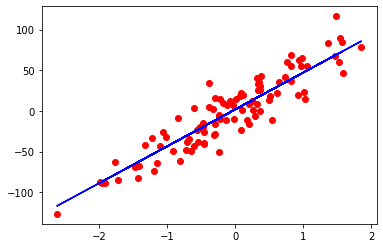

In [24]:
# plot

# detach: create a new tensor where require_grad=False
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b');